In [13]:
!which python3

/Users/elizabethcomstock/opt/anaconda3/bin/python3


# PROJECT REQUIREMENTS: THIS MODEL FAILED :/

In [14]:
#!pip install pandas_datareader

In [15]:
#!pip3 install seaborn

# INSTRUCTIONS FOR ML

<p> Ok. After many failed attempts I have decided on Seaborn. Same as always lets start with some libraries. Import tablib didnt work well here so we had to import using finta library and then use the TA features in that.</p>

In [17]:
# Import Libraries 

import pandas as pd 
import joblib
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time



In [18]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# for pandas_datareader, otherwise it might have issues, sometimes there is some version mismatch
pd.core.common.is_list_like = pd.api.types.is_list_like

# make pandas to print dataframes nicely
pd.set_option('expand_frame_repr', False)  

#newest yahoo API 
import yfinance as yahoo_finance
%matplotlib inline

<p> Note: Notice that this code is the same code in our TI_Calculations Excersise

In [19]:
# Pick your STOCK Ticker
ticker = 'AAPL'

# you can modify time for dataset import here:
start_time = datetime.datetime(2017, 10, 1)

# and here: end_time = datetime.datetime(2019, 1, 20)
end_time = datetime.datetime.now().date().isoformat() 

# Function Junction: Lets defining some functions 

In [20]:
# pull data
def get_data(ticker):
    
    # from yahoo finance which gives only daily historical data
    connected = False
    while not connected:
        try:
            df = web.get_data_yahoo(ticker, start=start_time, end=end_time)
            connected = True
            print('connected to yahoo')
        except Exception as e:
            print("type error: " + str(e))
            time.sleep( 5 )
            pass   

    # use numerical integer index instead of date    
    df = df.reset_index()
    
    return df

In [21]:
# Display data by defining the user defined variable. Standard "df" is used here:
df = get_data(ticker)

# Lets See what we got. use print to display
print(df.head(5))

connected to yahoo
        Date       High        Low       Open      Close      Volume  Adj Close
0 2017-10-02  38.612499  38.180000  38.564999  38.452499  74795200.0  36.698429
1 2017-10-03  38.772499  38.477501  38.502499  38.619999  64921200.0  36.858295
2 2017-10-04  38.465000  38.115002  38.407501  38.369999  80655200.0  36.619701
3 2017-10-05  38.860001  38.512501  38.544998  38.847500  85135200.0  37.075420
4 2017-10-06  38.872501  38.639999  38.742500  38.825001  69630400.0  37.053932


# COMPUTE TECHNICAL INDICATORS: EMA ATR ADX RSI MACD Bollinger Band
<p>Every day the team wanted there was no consensus as to what each team member wanted so I just ploted them all. If you read TI_Calculations notebook you dont need to ask me which indicator is here. <i>Poquito esfuerso,</i> folks. </p>

In [22]:
# ----------------------------------------Library wont import so we are doing a hard install
# https://nhancv.medium.com/macbook-pro-m1-homebrew-install-error-7170e4816894
# !pip install TA-Lib

In [23]:
# import talib as ta


# Initial imports
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

# Needed for decision tree visualization
#import pydotplus
from IPython.display import Image

# ImportError: dlopen(/Users/elizabethcomstock/opt/anaconda3/lib/python3.8/site-packages/talib/_ta_lib.cpython-38-darwin.so, 2): Symbol not found: _TA_ACOS
#  Referenced from: /Users/elizabethcomstock/opt/anaconda3/lib/python3.8/site-packages/talib/_ta_lib.cpython-38-darwin.so
 # Expected in: flat namespace
# in /Users/elizabethcomstock/opt/anaconda3/lib/python3.8/site-packages/talib/_ta_lib.cpython-38-darwin.so

In [24]:
# The team had varying dates that they wanted to explore. So I plotted many to accomidate there requests.

def compute_technical_indicators(df):
    # Note the EMA is plotted by days EMA5 or EMA10. This label helps id the timeperiod for the calculation of TI.
    df['EMA5'] = talib.EMA(df['Adj Close'].values, timeperiod=5)
    df['EMA10'] = talib.EMA(df['Adj Close'].values, timeperiod=10)
    df['EMA15'] = talib.EMA(df['Adj Close'].values, timeperiod=15)
    df['EMA20'] = talib.EMA(df['Adj Close'].values, timeperiod=10)
    df['EMA30'] = talib.EMA(df['Adj Close'].values, timeperiod=30)
    df['EMA40'] = talib.EMA(df['Adj Close'].values, timeperiod=40)
    df['EMA50'] = talib.EMA(df['Adj Close'].values, timeperiod=50)

    df['EMA60'] = talib.EMA(df['Adj Close'].values, timeperiod=60)
    df['EMA70'] = talib.EMA(df['Adj Close'].values, timeperiod=70)
    df['EMA80'] = talib.EMA(df['Adj Close'].values, timeperiod=80)
    df['EMA90'] = talib.EMA(df['Adj Close'].values, timeperiod=90)
    
    df['EMA100'] = talib.EMA(df['Adj Close'].values, timeperiod=100)
    df['EMA150'] = talib.EMA(df['Adj Close'].values, timeperiod=150)
    df['EMA200'] = talib.EMA(df['Adj Close'].values, timeperiod=200)

    df['upperBB'], df['middleBB'], df['lowerBB'] = talib.BBANDS(df['Adj Close'].values, timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)

    df['SAR'] = talib.SAR(df['High'].values, df['Low'].values, acceleration=0.02, maximum=0.2)

    df['RSI'] = talib.RSI(df['Adj Close'].values, timeperiod=14)

    df.tail()

    return df
# This should have rendered a dataset that labels each column with the technical indicators (TI) numeric values.


# EMA Buy Sell Indicators
<p>EMA indicators along side the existing candlestick formations. Exponential Moving Average (EMA) is similar to Simple Moving Average (SMA), measuring trend direction over a period of time. However, whereas SMA simply calculates an average of price data, EMA applies more weight to data that is more current. Because of its unique calculation, EMA will follow prices more closely than a corresponding SMA.</p><li>
    <h1>How this indicator works:</h1>
<p>Keep in mind that EMA is generally more sensitive to price movement. This can be a double-edged sword. On one side, it can help you identify trends earlier than an SMA would. On the flip side, the EMA will probably experience more short-term changes than a corresponding SMA.
 <li> 
<p>Use the EMA to determine trend direction, and trade in that direction. When the EMA rises, you may want to consider buying when prices dip near or just below the EMA. When the EMA falls, you may consider selling when prices rally towards or just above the EMA.</p>
<li>
<p>Moving averages can also indicate support and resistance areas. A rising EMA tends to support the price action, while a falling EMA tends to provide resistance to price action. This reinforces the strategy of buying when the price is near the rising EMA and selling when the price is near the falling EMA.</p>
   
<h2>WARNING</h2><p>All moving averages, including the EMA, are not designed to identify a trade at the exact bottom and top. Moving averages may help you trade in the general direction of a trend, but with a delay at the entry and exit points. The EMA has a shorter delay than the SMA with the same period.</p> <i>(Fidelity.com)</i>

In [25]:
# These are the signals that would have trained our Buy Sell indicators.
# When Above we Buy. When Below Sell

# When the EMA crosses the 0 threshhold Above we 
def compute_features(df):
    # computes features for forest decisions
    df['aboveEMA5'] = np.where(df['Adj Close'] > df['EMA5'], 1, -1)
    df['aboveEMA10'] = np.where(df['Adj Close'] > df['EMA10'], 1, -1)
    df['aboveEMA15'] = np.where(df['Adj Close'] > df['EMA15'], 1, -1)
    df['aboveEMA20'] = np.where(df['Adj Close'] > df['EMA20'], 1, -1)
    df['aboveEMA30'] = np.where(df['Adj Close'] > df['EMA30'], 1, -1)
    df['aboveEMA40'] = np.where(df['Adj Close'] > df['EMA40'], 1, -1)
    
    df['aboveEMA50'] = np.where(df['Adj Close'] > df['EMA50'], 1, -1)
    df['aboveEMA60'] = np.where(df['Adj Close'] > df['EMA60'], 1, -1)
    df['aboveEMA70'] = np.where(df['Adj Close'] > df['EMA70'], 1, -1)
    df['aboveEMA80'] = np.where(df['Adj Close'] > df['EMA80'], 1, -1)
    df['aboveEMA90'] = np.where(df['Adj Close'] > df['EMA90'], 1, -1)
    
    df['aboveEMA100'] = np.where(df['Adj Close'] > df['EMA100'], 1, -1)
    df['aboveEMA150'] = np.where(df['Adj Close'] > df['EMA150'], 1, -1)
    df['aboveEMA200'] = np.where(df['Adj Close'] > df['EMA200'], 1, -1)

    df['aboveUpperBB'] = np.where(df['Adj Close'] > df['upperBB'], 1, -1)
    df['belowLowerBB'] = np.where(df['Adj Close'] < df['lowerBB'], 1, -1)
    
    df['aboveSAR'] = np.where(df['Adj Close'] > df['SAR'], 1, -1)
   
    df['oversoldRSI'] = np.where(df['RSI'] < 30, 1, -1)
    df['overboughtRSI'] = np.where(df['RSI'] > 70, 1, -1)


    # very important - cleanup NaN values, otherwise prediction does not work
    df=df.fillna(0).copy()
    
    df.tail()

    return df

# ERRORS 
<p> Due to the error with an improper installation of a library and bc I did not create an env for this specific project, I installed Tenserflow for a previous attemp at this project and Kernels began to die. Ta-Lib, a library that is widely referenced in many research papers does not seem to work on an M1. there is some sort of failure when reading the file " or creating the wheel". 
    
    I am unsure of what this means. However having done my due diligence in asking my tutor, my TA, my proffessor, and my own research we can give up on making this work. <li> Henceforth, the code will be theoretical and visualized with graphs made in R or pulled from the internet to illustrate what SHOULD have happened if the library had imported properly and the code had worked. Note: Also tried it in Colab which indicated that it was supported of this library and had necessary dependencies but I was not successful with this solution either.</p> 

In [26]:
def compute_technical_indicators(df):
    
    df['EMA10'] = talib.EMA(df['Adj Close'].values, timeperiod=10)
    df['EMA30'] = talib.EMA(df['Adj Close'].values, timeperiod=30)
    df['ATR'] = talib.ATR(df['High'].values, df['Low'].values, df['Adj Close'].values, timeperiod=14)
    df['ADX'] = talib.ADX(df['High'].values, df['Low'].values, df['Adj Close'].values, timeperiod=14)
    df['RSI'] = talib.RSI(df['Adj Close'].values, timeperiod=14)
    macd, macdsignal, macdhist = talib.MACD(df['Adj Close'].values, fastperiod=12, slowperiod=26, signalperiod=9)
    df['MACD'] = macd
    df['MACDsignal'] = macdsignal
    
#df.tail()

#return df

In [27]:
def compute_technical_indicators(df):
    df['EMA5'] = ta.EMA(df['Adj Close'].values, timeperiod=5)
    df['EMA10'] = ta.EMA(df['Adj Close'].values, timeperiod=10)
    df['EMA15'] = ta.EMA(df['Adj Close'].values, timeperiod=15)
    df['EMA20'] = ta.EMA(df['Adj Close'].values, timeperiod=10)
    df['EMA30'] = ta.EMA(df['Adj Close'].values, timeperiod=30)
    df['EMA40'] = ta.EMA(df['Adj Close'].values, timeperiod=40)
    df['EMA50'] = ta.EMA(df['Adj Close'].values, timeperiod=50)

    df['EMA60'] = ta.EMA(df['Adj Close'].values, timeperiod=60)
    df['EMA70'] = ta.EMA(df['Adj Close'].values, timeperiod=70)
    df['EMA80'] = ta.EMA(df['Adj Close'].values, timeperiod=80)
    df['EMA90'] = ta.EMA(df['Adj Close'].values, timeperiod=90)
    
    df['EMA100'] = ta.EMA(df['Adj Close'].values, timeperiod=100)
    df['EMA150'] = ta.EMA(df['Adj Close'].values, timeperiod=150)
    df['EMA200'] = ta.EMA(df['Adj Close'].values, timeperiod=200)

    df['upperBB'], df['middleBB'], df['lowerBB'] = ta.BBANDS(df['Adj Close'].values, timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)

    df['SAR'] = ta.SAR(df['High'].values, df['Low'].values, acceleration=0.02, maximum=0.2)

    df['RSI'] = ta.RSI(df['Adj Close'].values, timeperiod=14)

    df.tail()

#    return df

In [28]:
def compute_features(df):
    # computes features for forest decisions
    df['aboveEMA5'] = np.where(df['Adj Close'] > df['EMA5'], 1, -1)
    df['aboveEMA10'] = np.where(df['Adj Close'] > df['EMA10'], 1, -1)
    df['aboveEMA15'] = np.where(df['Adj Close'] > df['EMA15'], 1, -1)
    df['aboveEMA20'] = np.where(df['Adj Close'] > df['EMA20'], 1, -1)
    df['aboveEMA30'] = np.where(df['Adj Close'] > df['EMA30'], 1, -1)
    df['aboveEMA40'] = np.where(df['Adj Close'] > df['EMA40'], 1, -1)
    
    df['aboveEMA50'] = np.where(df['Adj Close'] > df['EMA50'], 1, -1)
    df['aboveEMA60'] = np.where(df['Adj Close'] > df['EMA60'], 1, -1)
    df['aboveEMA70'] = np.where(df['Adj Close'] > df['EMA70'], 1, -1)
    df['aboveEMA80'] = np.where(df['Adj Close'] > df['EMA80'], 1, -1)
    df['aboveEMA90'] = np.where(df['Adj Close'] > df['EMA90'], 1, -1)
    
    df['aboveEMA100'] = np.where(df['Adj Close'] > df['EMA100'], 1, -1)
    df['aboveEMA150'] = np.where(df['Adj Close'] > df['EMA150'], 1, -1)
    df['aboveEMA200'] = np.where(df['Adj Close'] > df['EMA200'], 1, -1)

    df['aboveUpperBB'] = np.where(df['Adj Close'] > df['upperBB'], 1, -1)
    df['belowLowerBB'] = np.where(df['Adj Close'] < df['lowerBB'], 1, -1)
    
    df['aboveSAR'] = np.where(df['Adj Close'] > df['SAR'], 1, -1)
   
    df['oversoldRSI'] = np.where(df['RSI'] < 30, 1, -1)
    df['overboughtRSI'] = np.where(df['RSI'] > 70, 1, -1)

In [29]:
 # very important - cleanup NaN values, otherwise prediction does not work
df=df.fillna(0).copy()
df.tail()


,Date,High,Low,Open,Close,Volume,Adj Close
964,2021-08-02,146.949997,145.250000,146.360001,145.520004,62880000.0,145.302307
965,2021-08-03,148.039993,145.179993,145.809998,147.360001,64660800.0,147.139542
966,2021-08-04,147.789993,146.279999,147.270004,146.949997,56368300.0,146.730164
967,2021-08-05,147.839996,146.169998,146.979996,147.059998,46397700.0,146.839996
968,2021-08-06,147.110001,145.630005,146.350006,146.139999,54067400.0,146.139999


In [30]:
def plot_train_data(df):
    # plot price
    plt.figure(figsize=(15,2.5))
    plt.title('Stock data ' + str(ticker))
    plt.plot(df['Date'], df['Adj Close'])
    #plt.title('Price chart (Adj Close) ' + str(ticker))
    plt.show()
    return None

# Targets

In [31]:
def define_target_condition(df):
 
    # price higher later - bad predictive results
    #df['target_cls'] = np.where(df['Adj Close'].shift(-34) > df['Adj Close'], 1, 0)    
    
    # price above trend multiple days later
    df['target_cls'] = np.where(df['Adj Close'].shift(-55) > df.EMA150.shift(-55), 1, 0)

    # important, remove NaN values
    df=df.fillna(0).copy()
    
    df.tail()
    
    return df

# Train

In [32]:
def splitting_and_training(df):
    # predictors when above sell when below buy
    predictors_list = ['aboveSAR','aboveUpperBB','belowLowerBB','RSI','oversoldRSI','overboughtRSI',
                       'aboveEMA5','aboveEMA10','aboveEMA15','aboveEMA20','aboveEMA30','aboveEMA40','aboveEMA50',
                       'aboveEMA60','aboveEMA70','aboveEMA80','aboveEMA90',
                       'aboveEMA100']
    
    
    # __features__
    X = df[predictors_list].fillna(0)
    X.tail()

    # __targets__
    y_cls = df.target_cls.fillna(0)
    y_cls.tail(10)

    # __train test split__
    from sklearn.model_selection import train_test_split
    y=y_cls
    X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X, y, test_size=0.3, random_state=432, stratify=y)

    print (X_cls_train.shape, y_cls_train.shape)
    print (X_cls_test.shape, y_cls_test.shape)

    # __RANDOM FOREST __       - retrainable - warm_start
    from sklearn.ensemble import RandomForestClassifier

    #Create a Gaussian Classifier - incremental training - warm_start=True
    clf=RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=20, min_samples_leaf=10, 
                               n_jobs=-1, warm_start=True)

    # __ACTUAL TRAINING __
    clf = clf.fit(X_cls_train, y_cls_train)
    clf

    # __making accuracy report__
    # ideally should be getting better with each round
    y_cls_pred = clf.predict(X_cls_test)

    from sklearn.metrics import classification_report
    report = classification_report(y_cls_test, y_cls_pred)
    print(report)

    return clf

In [33]:
def plot_train_data(df):
    # plot price
    plt.figure(figsize=(15,2.5))
    plt.title('Stock data ' + str(ticker))
    plt.plot(df['Date'], df['Adj Close'])
    #plt.title('Price chart (Adj Close) ' + str(ticker))
    plt.show()
    return None

In [34]:
# Target

In [35]:
def define_target_condition(df):
 
    # price higher later - bad predictive results
    #df['target_cls'] = np.where(df['Adj Close'].shift(-34) > df['Adj Close'], 1, 0)    
    
    # price above trend multiple days later
    df['target_cls'] = np.where(df['Adj Close'].shift(-55) > df.EMA150.shift(-55), 1, 0)

    # important, remove NaN values
    df=df.fillna(0).copy()
    
    df.tail()
    
    return df

# Train and Test

In [48]:
def splitting_and_training(df):
    # __predictors__
    predictors_list = ['aboveSAR','aboveUpperBB','belowLowerBB','RSI','oversoldRSI','overboughtRSI',
                       'aboveEMA5','aboveEMA10','aboveEMA15','aboveEMA20','aboveEMA30','aboveEMA40','aboveEMA50',
                       'aboveEMA60','aboveEMA70','aboveEMA80','aboveEMA90',
                       'aboveEMA100']
    
    
    # __features__
    X = df[predictors_list].fillna(0)
    X.tail()

    # __targets__
    y_cls = df.target_cls.fillna(0)
    y_cls.tail(10)

    # __train test split__
    from sklearn.model_selection import train_test_split
    y=y_cls
    X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X, y, test_size=0.3, random_state=432, stratify=y)

    print (X_cls_train.shape, y_cls_train.shape)
    print (X_cls_test.shape, y_cls_test.shape)

    # __RANDOM FOREST __       - retrainable - warm_start
    from sklearn.ensemble import RandomForestClassifier

    #Create a Gaussian Classifier - incremental training - warm_start=True
    clf=RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=20, min_samples_leaf=10, 
                               n_jobs=-1, warm_start=True)

    # __ACTUAL TRAINING __
    clf = clf.fit(X_cls_train, y_cls_train)
    clf

    # __making accuracy report__
    # ideally should be getting better with each round
    y_cls_pred = clf.predict(X_cls_test)

    from sklearn.metrics import classification_report
    report = classification_report(y_cls_test, y_cls_pred)
    print(report)

    return clf

In [49]:
# get trained classifier
#clf = splitting_and_training(df)

In [50]:
#plot_train_data(df)

In [51]:
#df

In [52]:
def predict_timeseries(df, clf):
    
    # making sure we have good dimensions
    # column will be rewritten later
    df['Buy'] = df['target_cls']
    
    for i in range(len(df)):
        X_cls_valid = [[df['aboveSAR'][i],df['aboveUpperBB'][i],df['belowLowerBB'][i],
                        df['RSI'][i],df['oversoldRSI'][i],df['overboughtRSI'][i],
                        df['aboveEMA5'][i],df['aboveEMA10'][i],df['aboveEMA15'][i],df['aboveEMA20'][i],
                        df['aboveEMA30'][i],df['aboveEMA40'][i],df['aboveEMA50'][i],
                        df['aboveEMA60'][i],df['aboveEMA70'][i],df['aboveEMA80'][i],df['aboveEMA90'][i],
                        df['aboveEMA100'][i]]]    

        y_cls_pred_valid = clf.predict(X_cls_valid)
        df['Buy'][i] = y_cls_pred_valid[0].copy()

    print(df.head())    
        
    return df

In [53]:
def plot_stock_prediction(df, ticker):
    # plot  values and significant levels
    plt.figure(figsize=(20,7))
    plt.title('Predictive model ' + str(ticker))
    plt.plot(df['Date'], df['Adj Close'], label='High', alpha=0.2)

    plt.plot(df['Date'], df['EMA10'], label='EMA10', alpha=0.2)
    plt.plot(df['Date'], df['EMA20'], label='EMA20', alpha=0.2)
    plt.plot(df['Date'], df['EMA30'], label='EMA30', alpha=0.2)
    plt.plot(df['Date'], df['EMA40'], label='EMA40', alpha=0.2)
    plt.plot(df['Date'], df['EMA50'], label='EMA50', alpha=0.2)
    plt.plot(df['Date'], df['EMA100'], label='EMA100', alpha=0.2)
    plt.plot(df['Date'], df['EMA150'], label='EMA150', alpha=0.99)
    plt.plot(df['Date'], df['EMA200'], label='EMA200', alpha=0.2)


    plt.scatter(df['Date'], df['Buy']*df['Adj Close'], label='Buy', marker='^', color='magenta', alpha=0.15)
    #lt.scatter(df.index, df['sell_sig'], label='Sell', marker='v')

    plt.legend()

    plt.show()

    return None 

In [54]:
def save_model(clf):
    import joblib

    joblib.dump(clf, "./random_forest.joblib")

    return None

# Training Sequence

In [55]:
# training stock data
tickers = ['AAPL'] 

connected to yahoo


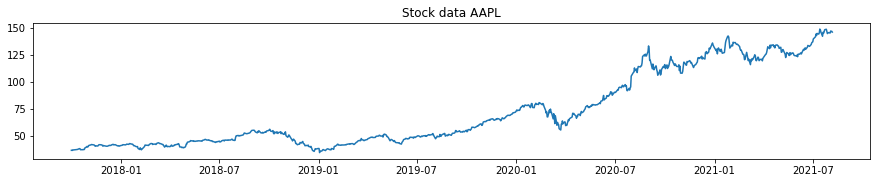

NameError: name 'ta' is not defined

In [56]:
for ticker in tickers:

    df = get_data(ticker)
    plot_train_data(df)
    df = compute_technical_indicators(df)
    df = compute_features(df)
    df=define_target_condition(df)

    clf = splitting_and_training(df)

    save_model(clf)
    
    # commenting out saves time during training
    #df = predict_timeseries(df, clf)
    #plot_stock_prediction(df, ticker)

# Predictions

In [58]:
#ticker='BP'
#ticker='ABBV'
#ticker='GILD'
#ticker='NGG'
ticker='AAPL'

In [ ]:
# load classifier, no need to initialize the loaded_rf
loaded_clf = joblib.load("./random_forest.joblib")
clf = loaded_clf

In [ ]:
new_df = get_data(ticker)

In [ ]:
new_df = compute_technical_indicators(new_df)

In [ ]:
new_df = compute_features(new_df)

In [ ]:
new_df=define_target_condition(new_df)

In [ ]:
new_df = predict_timeseries(new_df, clf)

In [ ]:
Below plots are showing predictions on unseen dataset. When the triangle overlay is on the price data, it means buy. When the triangle is on the zero level, it means, don't buy. This model is pretty much giving only long signals, but cen be extrapolated to sell signals as well.

So the Buy signal means, that the model thinks that in n days (here 55 days) the price will be above specific Exponencial Moving Average (here was trained to be above 150 EMA in 55 days).

We see that the model is giving some false positive signals (of course it is), but not that many actually. It just sometimes expects trend reversal too early, but if we are using this as an investing advisor for long term hold or long term swing trades, the signals provided by the model are very nice.

In [ ]:
plot_stock_prediction(new_df, ticker)

In [ ]:
# zoom in on the data
temp_df = new_df[-700:]

In [ ]:
plot_stock_prediction(temp_df, ticker)